# Naive bayes classifier

Create a Naive Bayes classifier for each handwritten digit that support discrete and continuous features

### inputs

- Training image data from [MNIST](http://yann.lecun.com/exdb/mnist/) 

### outputs

- posterior (in log scale to avoid underflow) of the ten categories (0-9) for each row in INPUT 3 
- error rate 

In [30]:
import matplotlib.pyplot as plt
from functools import reduce

In [54]:
def showBytesImage(byte, row = 28, col = 28):
    im = [[byte[i*28 + j] for j in range(col)] for i in range(row)]
    
    plt.imshow(im, cmap='gray')
    

class idx_file():
    def __init__(self, file):
        self.filename = file
        self.datas = []
        
        with open(self.filename, mode='rb') as f:
            magic_number = f.read(4)
            
            self.n_dim = magic_number[-1]
            
            self.n_dims = [int.from_bytes(f.read(4), byteorder='big') for _ in range(self.n_dim)]
    
            for idx in range(self.n_dims[0]):
                item = f.read(reduce(lambda x,y: x*y, (self.n_dims[1:] + [1])))
        
                self.datas.append(item)
        

In [57]:
%%time
# filename train-images.idx3-ubyte
# filename train-labels.idx1-ubyte

train_images = idx_file('train-images.idx3-ubyte')
print(len(train_images.datas[0]))
train_labels = idx_file('train-labels.idx1-ubyte')
print(len(train_labels.datas[0]))

784
1
CPU times: user 157 ms, sys: 25 ms, total: 182 ms
Wall time: 182 ms


In [46]:
len(train_images)

60000

b'\x03'


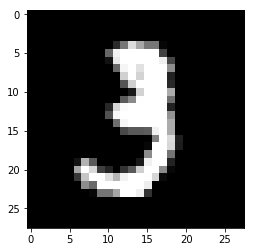

In [60]:
showBytesImage(train_images.datas[10])
print(train_labels.datas[10])